# Install required packages

# Data Collection & Preprocessing

In [18]:
import pandas as pd
from datetime import datetime

# Load the Excel file
file_path = "MonthlyStockData.xlsx"
df = pd.read_excel(file_path)
df.rename(columns={df.columns[0]: "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df.dropna(subset=["Date"], inplace=True)
print(df.head())


        Date  ZTS UN Equity  ZBRA UW Equity  ZBH UN Equity  YUM UN Equity  \
0 2001-02-28            NaN         20.0278            NaN         6.9209   
1 2001-03-30            NaN         16.9444            NaN         6.8652   
2 2001-04-30            NaN         19.2267            NaN         8.0570   
3 2001-05-31            NaN         20.0133            NaN         8.2152   
4 2001-06-29            NaN         21.8311            NaN         7.8916   

   XYL UN Equity  XOM UN Equity  XEL UW Equity  WYNN UW Equity  WY UN Equity  \
0            NaN         40.525            NaN             NaN       21.9939   
1            NaN         40.500            NaN             NaN       20.7865   
2            NaN         44.300            NaN             NaN       23.1357   
3            NaN         44.375            NaN             NaN       23.4140   
4            NaN         43.675            NaN             NaN       22.4973   

   ...  ADM UN Equity  ADI UW Equity  ADBE UW Equity  AC

# Filtering for last 5 years

In [19]:
cutoff_date = datetime.now() - pd.DateOffset(years=5)
# Filter data for the last 5 years
df_filtered = df[df["Date"] >= cutoff_date]
print(df_filtered)
df_filtered.iloc[:, 1:] = df_filtered.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

stocks_with_missing_values = df_filtered.columns[df_filtered.isna().any()].tolist()
print(stocks_with_missing_values)
# Drop stocks that have missing values in the last 5 years
df_cleaned = df_filtered.dropna(axis=1)
print(df_cleaned.head())

          Date  ZTS UN Equity  ZBRA UW Equity  ZBH UN Equity  YUM UN Equity  \
229 2020-03-31         117.69          183.60        98.0600          68.53   
230 2020-04-30         129.31          229.66       116.1237          86.43   
231 2020-05-29         139.39          261.32       122.5653          89.73   
232 2020-06-30         137.04          255.95       115.7939          86.91   
233 2020-07-31         151.68          280.75       130.8308          91.05   
234 2020-08-31         160.10          286.53       136.6709          95.85   
235 2020-09-30         165.37          252.46       132.0725          91.30   
236 2020-10-30         158.55          283.64       128.1532          93.33   
237 2020-11-30         160.38          378.42       144.6647         105.80   
238 2020-12-31         165.50          384.33       149.4863         108.56   
239 2021-01-29         154.25          387.83       149.0788         101.49   
240 2021-02-26         155.24          499.43       

In [22]:
from IPython.display import display
display(df_cleaned)

,Date,ZTS UN Equity,ZBRA UW Equity,ZBH UN Equity,YUM UN Equity,XYL UN Equity,XOM UN Equity,XEL UW Equity,WYNN UW Equity,WY UN Equity,...,ADP UW Equity,ADM UN Equity,ADI UW Equity,ADBE UW Equity,ACN UN Equity,ACGL UW Equity,ABT UN Equity,ABBV UN Equity,AAPL UW Equity,A UN Equity
229,2020-03-31,117.69,183.60,98.0600,68.53,65.13,37.97,60.300,60.19,16.95,...,136.68,35.18,89.65,318.24,163.26,28.460,78.91,76.19,63.573,71.62
230,2020-04-30,129.31,229.66,116.1237,86.43,71.90,46.47,63.560,85.53,21.87,...,146.69,37.14,109.60,353.64,185.19,24.030,92.09,82.20,73.450,76.66
231,2020-05-29,139.39,261.32,122.5653,89.73,66.34,45.47,65.030,83.28,20.19,...,146.49,39.31,112.95,386.60,201.62,28.220,94.92,92.67,79.485,88.14
232,2020-06-30,137.04,255.95,115.7939,86.91,64.96,44.72,62.500,74.49,22.46,...,148.89,39.90,122.64,435.31,214.72,28.650,91.43,98.18,91.200,88.37
233,2020-07-31,151.68,280.75,130.8308,91.05,72.98,42.08,69.040,72.43,27.81,...,132.91,42.83,114.85,444.32,224.78,30.750,100.64,94.91,106.260,96.33
234,2020-08-31,160.10,286.53,136.6709,95.85,80.18,39.94,69.475,87.45,30.31,...,139.09,44.76,116.88,513.39,239.93,31.540,109.47,95.77,129.040,100.42
235,2020-09-30,165.37,252.46,132.0725,91.30,84.12,34.33,69.010,71.81,28.52,...,139.49,46.49,116.74,490.43,225.99,29.250,108.83,87.59,115.810,100.94
236,2020-10-30,158.55,283.64,128.1532,93.33,87.14,32.62,70.030,72.43,27.29,...,157.96,46.24,118.53,447.10,216.91,30.210,105.11,85.10,108.860,102.09
237,2020-11-30,160.38,378.42,144.6647,105.80,95.97,38.13,67.360,100.50,29.04,...,173.88,49.77,139.08,478.47,249.09,32.195,108.22,104.58,119.050,116.90
238,2020-12-31,165.50,384.33,149.4863,108.56,101.79,41.22,66.670,112.83,33.53,...,176.20,50.41,147.73,500.12,261.21,36.070,109.49,107.15,132.690,118.49


In [23]:
output_file = "Cleaned_StockData.xlsx"
df_cleaned.to_excel(output_file, index=False)
print(f"Cleaned stock data saved to: {output_file}")

Cleaned stock data saved to: Cleaned_StockData.xlsx


In [24]:
print("Stocks removed due to missing values in the last 5 years:")
print(stocks_with_missing_values)

Stocks removed due to missing values in the last 5 years:
['WBD UW Equity', 'VLTO UN Equity', 'SW UN Equity', 'SOLV UN Equity', 'ROP UW Equity', 'PLTR UW Equity', 'PANW UW Equity', 'MTCH UW Equity', 'LIN UW Equity', 'KVUE UN Equity', 'KDP UW Equity', 'HST UW Equity', 'HON UW Equity', 'GEV UN Equity', 'GEHC UW Equity', 'EVRG UW Equity', 'DPZ UW Equity', 'CPB UW Equity', 'COO UW Equity', 'CEG UW Equity', 'BKR UW Equity', 'APA UW Equity', 'AEP UW Equity', 'ABNB UW Equity']


In [31]:
# Load the cleaned dataset
file_path = "Cleaned_StockData.xlsx"
df = pd.read_excel(file_path)
print(df.columns) 
# Convert "Date" column to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Display the first few rows
print(df.head())
df_long = df.melt(id_vars=["Date"], var_name="Ticker", value_name="Closing_Price")
# Sort by Date & Ticker
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)
print(df_long.head())

Index(['Date', 'ZTS UN Equity', 'ZBRA UW Equity', 'ZBH UN Equity',
       'YUM UN Equity', 'XYL UN Equity', 'XOM UN Equity', 'XEL UW Equity',
       'WYNN UW Equity', 'WY UN Equity',
       ...
       'ADP UW Equity', 'ADM UN Equity', 'ADI UW Equity', 'ADBE UW Equity',
       'ACN UN Equity', 'ACGL UW Equity', 'ABT UN Equity', 'ABBV UN Equity',
       'AAPL UW Equity', 'A UN Equity'],
      dtype='object', length=480)
            ZTS UN Equity  ZBRA UW Equity  ZBH UN Equity  YUM UN Equity  \
Date                                                                      
2020-03-31         117.69          183.60        98.0600          68.53   
2020-04-30         129.31          229.66       116.1237          86.43   
2020-05-29         139.39          261.32       122.5653          89.73   
2020-06-30         137.04          255.95       115.7939          86.91   
2020-07-31         151.68          280.75       130.8308          91.05   

            XYL UN Equity  XOM UN Equity  XEL UW Equ

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Date']"

In [33]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "Cleaned_StockData.xlsx"
df = pd.read_excel(file_path)

# Debugging: Check column names
print("Column names before renaming:", df.columns)

# Strip spaces from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Convert "Date" column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Debugging: Check if "Date" exists now
print("Column names after renaming:", df.columns)

# Ensure "Date" column exists before melting
if "Date" in df.columns:
    df_long = df.melt(id_vars=["Date"], var_name="Ticker", value_name="Closing_Price")

    # Sort by Date & Ticker
    df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

    # Display the transformed DataFrame
    print(df_long.head())

    # Save the reshaped data
    df_long.to_excel("Stock_Features_Long_Format.xlsx", index=False)
else:
    print("ERROR: 'Date' column not found in the DataFrame!")

print(df_long.head())

Column names before renaming: Index(['Date', 'ZTS UN Equity', 'ZBRA UW Equity', 'ZBH UN Equity',
       'YUM UN Equity', 'XYL UN Equity', 'XOM UN Equity', 'XEL UW Equity',
       'WYNN UW Equity', 'WY UN Equity',
       ...
       'ADP UW Equity', 'ADM UN Equity', 'ADI UW Equity', 'ADBE UW Equity',
       'ACN UN Equity', 'ACGL UW Equity', 'ABT UN Equity', 'ABBV UN Equity',
       'AAPL UW Equity', 'A UN Equity'],
      dtype='object', length=480)
Column names after renaming: Index(['Date', 'ZTS UN Equity', 'ZBRA UW Equity', 'ZBH UN Equity',
       'YUM UN Equity', 'XYL UN Equity', 'XOM UN Equity', 'XEL UW Equity',
       'WYNN UW Equity', 'WY UN Equity',
       ...
       'ADP UW Equity', 'ADM UN Equity', 'ADI UW Equity', 'ADBE UW Equity',
       'ACN UN Equity', 'ACGL UW Equity', 'ABT UN Equity', 'ABBV UN Equity',
       'AAPL UW Equity', 'A UN Equity'],
      dtype='object', length=480)
        Date       Ticker  Closing_Price
0 2020-03-31  A UN Equity          71.62
1 2020-04-30  A

In [34]:
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)
df_long["Simple_Return"] = df_long.groupby("Ticker")["Closing_Price"].pct_change()
df_long["Log_Return"] = np.log(1 + df_long["Simple_Return"])

print(df_long.head())

        Date       Ticker  Closing_Price  Simple_Return  Log_Return
0 2020-03-31  A UN Equity          71.62            NaN         NaN
1 2020-04-30  A UN Equity          76.66       0.070371    0.068006
2 2020-05-29  A UN Equity          88.14       0.149752    0.139546
3 2020-06-30  A UN Equity          88.37       0.002609    0.002606
4 2020-07-31  A UN Equity          96.33       0.090076    0.086247


In [35]:
df_long["Rolling_20D_Volatility"] = (
    df_long.groupby("Ticker")["Log_Return"]
    .rolling(window=20, min_periods=5)
    .std()
    .reset_index(level=0, drop=True)
)

df_long["SMA_50"] = (
    df_long.groupby("Ticker")["Closing_Price"]
    .rolling(window=50, min_periods=5)
    .mean()
    .reset_index(level=0, drop=True)
)

df_long["SMA_200"] = (
    df_long.groupby("Ticker")["Closing_Price"]
    .rolling(window=200, min_periods=5)
    .mean()
    .reset_index(level=0, drop=True)
)

# 3️⃣ **MACD (Moving Average Convergence Divergence)**
df_long["EMA_12"] = df_long.groupby("Ticker")["Closing_Price"].transform(lambda x: x.ewm(span=12, adjust=False).mean())
df_long["EMA_26"] = df_long.groupby("Ticker")["Closing_Price"].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df_long["MACD"] = df_long["EMA_12"] - df_long["EMA_26"]

# 4️⃣ **RSI (Relative Strength Index)**
delta = df_long.groupby("Ticker")["Closing_Price"].diff()

gain = (delta.where(delta > 0, 0)).groupby(df_long["Ticker"]).rolling(14, min_periods=5).mean().reset_index(level=0, drop=True)
loss = (-delta.where(delta < 0, 0)).groupby(df_long["Ticker"]).rolling(14, min_periods=5).mean().reset_index(level=0, drop=True)

rs = gain / loss
df_long["RSI"] = 100 - (100 / (1 + rs))

# 5️⃣ **Bollinger Bands**
df_long["SMA_20"] = (
    df_long.groupby("Ticker")["Closing_Price"]
    .rolling(window=20, min_periods=5)
    .mean()
    .reset_index(level=0, drop=True)
)

df_long["Upper_BB"] = df_long["SMA_20"] + (2 * df_long["Rolling_20D_Volatility"])
df_long["Lower_BB"] = df_long["SMA_20"] - (2 * df_long["Rolling_20D_Volatility"])

# Save the updated dataset
df_long.to_excel("Stock_Features_Complete.xlsx", index=False)

# Display the new dataset structure
print(df_long.head())

        Date       Ticker  Closing_Price  Simple_Return  Log_Return  \
0 2020-03-31  A UN Equity          71.62            NaN         NaN   
1 2020-04-30  A UN Equity          76.66       0.070371    0.068006   
2 2020-05-29  A UN Equity          88.14       0.149752    0.139546   
3 2020-06-30  A UN Equity          88.37       0.002609    0.002606   
4 2020-07-31  A UN Equity          96.33       0.090076    0.086247   

   Rolling_20D_Volatility  SMA_50  SMA_200     EMA_12     EMA_26      MACD  \
0                     NaN     NaN      NaN  71.620000  71.620000  0.000000   
1                     NaN     NaN      NaN  72.395385  71.993333  0.402051   
2                     NaN     NaN      NaN  74.817633  73.189383  1.628250   
3                     NaN     NaN      NaN  76.902613  74.313873  2.588740   
4                     NaN  84.224   84.224  79.891441  75.944697  3.946744   

     RSI  SMA_20  Upper_BB  Lower_BB  
0    NaN     NaN       NaN       NaN  
1    NaN     NaN       NaN

# Simple Moving Average Technique

 Moving Average (MA) Model
✅ Definition: A simple smoothing technique that averages the last n values to predict future values.
✅ Formula:

𝑀
𝑡
=
𝑋
𝑡
+
𝑋
𝑡
−
1
+
.
.
.
+
𝑋
𝑡
−
𝑛
𝑛
M 
t
​
 = 
n
X 
t
​
 +X 
t−1
​
 +...+X 
t−n
​
 
​
 
✅ Your Code Implementation: Computes moving averages over different windows (5, 10, 20, 50 days).

📌 Advantages:
✔ Simple to implement and easy to understand.
✔ Good for trend-following and smoothing fluctuations.
✔ No need for stationarity transformation.

❌ Disadvantages:
⛔ Doesn’t model patterns beyond short-term smoothing.
⛔ Fails to capture seasonality and volatility.
⛔ Assumes all past values contribute equally (doesn't weight recent values more).

Use Moving Averages (MA) if:

You want trend-following signals.
You want a simple baseline model.
You are analyzing past trends rather than forecasting.
Use ARIMA if:

You need a predictive model for stock prices.
You want to model trends, seasonality, and volatility.
You need short-to-medium-term forecasting.

In [36]:
import pandas as pd

# Load the dataset
file_path = "Stock_Features_Long_Format.xlsx"
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort by Ticker & Date (important for rolling calculations)
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Define Moving Average Lookback Windows
lookback_windows = [5, 10, 20, 50]  # Common periods for moving averages

# Compute Moving Averages for different windows
for n in lookback_windows:
    df_long[f"MA_{n}"] = (
        df_long.groupby("Ticker")["Closing_Price"]
        .rolling(window=n, min_periods=1)  # Allows calculation even when full window isn't available
        .mean()
        .reset_index(level=0, drop=True)
    )

# Save the updated dataset
df_long.to_excel("Stock_Moving_Average.xlsx", index=False)

# Display sample data
print(df_long.head())


        Date       Ticker  Closing_Price       MA_5      MA_10      MA_20  \
0 2020-03-31  A UN Equity          71.62  71.620000  71.620000  71.620000   
1 2020-04-30  A UN Equity          76.66  74.140000  74.140000  74.140000   
2 2020-05-29  A UN Equity          88.14  78.806667  78.806667  78.806667   
3 2020-06-30  A UN Equity          88.37  81.197500  81.197500  81.197500   
4 2020-07-31  A UN Equity          96.33  84.224000  84.224000  84.224000   

       MA_50  
0  71.620000  
1  74.140000  
2  78.806667  
3  81.197500  
4  84.224000  


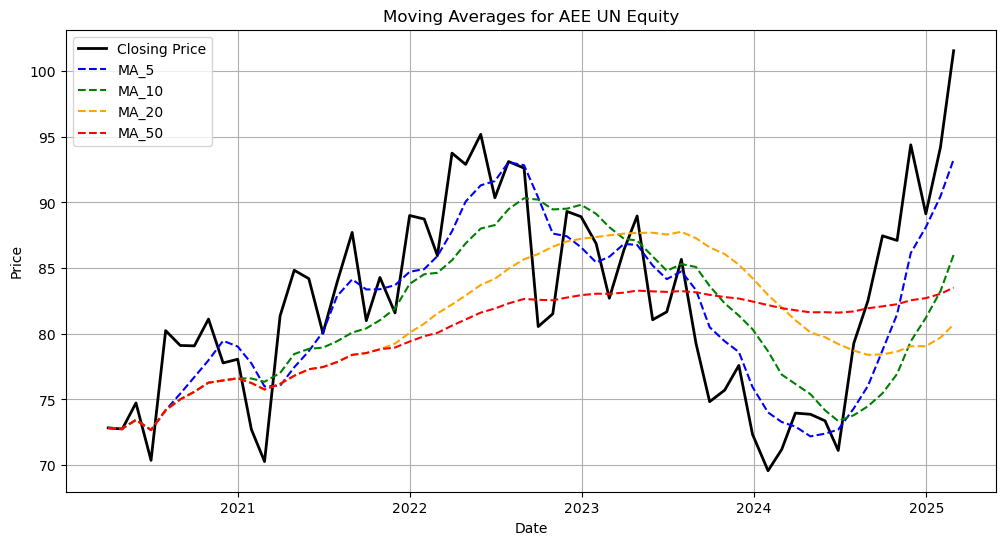

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Stock_Moving_Average.xlsx"  # Ensure this file is generated before running the script
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Select a sample stock ticker for visualization
sample_ticker = df_long["Ticker"].unique()[11]  # Picking the first stock for visualization
df_stock = df_long[df_long["Ticker"] == sample_ticker]

# Plot Closing Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df_stock["Date"], df_stock["Closing_Price"], label="Closing Price", linewidth=2, color='black')

# Plot moving averages
lookback_windows = [5, 10, 20, 50]  # Ensure these columns exist in the dataset
colors = ['blue', 'green', 'orange', 'red']
for i, n in enumerate(lookback_windows):
    plt.plot(df_stock["Date"], df_stock[f"MA_{n}"], label=f"MA_{n}", linestyle='dashed', color=colors[i])

# Formatting the plot
plt.title(f"Moving Averages for {sample_ticker}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()

# Show the plot
plt.show()


# ARIMA Modelling

### Are log return stationary?

In [42]:
from statsmodels.tsa.stattools import adfuller
# Load dataset
file_path = "Stock_Features_Complete.xlsx"
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Select a stock for testing (change ticker as needed)
ticker = "A UN Equity"  # Replace with any stock ticker from your dataset
df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")

# Drop NaN values in Log Returns
log_returns = df_stock["Log_Return"].dropna()

# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(log_returns)

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

if adf_result[1] < 0.05:
    print("✅ Log returns are stationary (Proceed with ARIMA)")
else:
    print("❌ Log returns are non-stationary (Consider differencing)")

ADF Statistic: -8.308112042010302
p-value: 3.854171150469278e-13
✅ Log returns are stationary (Proceed with ARIMA)


In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
file_path = "Stock_Features_Complete.xlsx"
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Get unique tickers
tickers = df_long["Ticker"].unique()

# Dictionary to store ARIMA results
arima_results = {}

print("\n🔍 Running ARIMA Modeling for All Stocks...\n")

# Loop through each ticker and apply ARIMA
for ticker in tickers:
    df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")
    
    # Drop NaN values in Log Returns
    log_returns = df_stock["Log_Return"].dropna()
    
    # Skip tickers with insufficient data
    if len(log_returns) < 30:
        arima_results[ticker] = {"status": "Insufficient data (Skipping)"}
        continue
    
    # Step 1️⃣ Perform the Augmented Dickey-Fuller (ADF) test
    adf_result = adfuller(log_returns)
    p_value = adf_result[1]
    
    # Step 2️⃣ Check stationarity
    if p_value < 0.05:
        arima_results[ticker] = {"status": "Stationary (ARIMA can be applied directly)"}
        d_value = 0  # No differencing needed
    else:
        arima_results[ticker] = {"status": "Non-stationary (Differencing needed)"}
        d_value = 1  # Differencing required
    
    # Step 3️⃣ Fit ARIMA model
    try:
        model = ARIMA(log_returns, order=(1, d_value, 1))  # Using (p=1, d=d_value, q=1)
        model_fit = model.fit()
        
        # Step 4️⃣ Forecast next 5 periods
        forecast_steps = 5
        forecast = model_fit.forecast(steps=forecast_steps)
        
        # Step 5️⃣ Convert predicted log returns to stock prices
        last_known_price = df_stock["Closing_Price"].iloc[-1]
        predicted_prices = [last_known_price * np.exp(sum(forecast[:i])) for i in range(1, forecast_steps + 1)]
        
        # Store results
        arima_results[ticker]["forecast"] = predicted_prices
    
    except Exception as e:
        arima_results[ticker]["error"] = str(e)

# Step 6️⃣ Display results
print("\n✅ ARIMA Results Summary:\n")
for ticker, result in arima_results.items():
    print(f"📊 Ticker: {ticker}")
    print(f"   - Status: {result['status']}")
    if "forecast" in result:
        print(f"   - Predicted Prices (Next 5 periods): {result['forecast']}")
    if "error" in result:
        print(f"   - Error: {result['error']}")
    print("----------------------------------------------------")



🔍 Running ARIMA Modeling for All Stocks...



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will b


✅ ARIMA Results Summary:

📊 Ticker: A UN Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [133.72151819449888, 131.91453885347156, 135.499308683534, 135.313482808053, 137.8100171543411]
----------------------------------------------------
📊 Ticker: AAPL UW Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [249.56834533925556, 254.40154839266032, 260.76920697591004, 266.62859747951063, 272.9275637039778]
----------------------------------------------------
📊 Ticker: ABBV UN Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [210.95062164747557, 213.14828494912766, 215.56730860998368, 218.16573395376747, 220.91187245162357]
----------------------------------------------------
📊 Ticker: ABT UN Equity
   - Status: Stationary (ARIMA can be applied directly)
   - Predicted Prices (Next 5 periods): [138.0043392978864, 138.6069246179679

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will b

# Backtesting

In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "Stock_Features_Complete.xlsx"
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Select a stock ticker (Example: A UN Equity)
ticker = "A UN Equity"  # Change this to test different stocks
df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")

# Drop NaN values in Log Returns
log_returns = df_stock["Log_Return"].dropna()

# Split Data: 80% Training, 20% Testing
split_index = int(len(log_returns) * 0.8)
train_data, test_data = log_returns[:split_index], log_returns[split_index:]

print(f"Training Size: {len(train_data)}, Testing Size: {len(test_data)}")

# Fit ARIMA Model on Training Data
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for Test Data
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

# Convert Forecasted Log Returns to Prices
last_train_price = df_stock["Closing_Price"].iloc[split_index - 1]

# Ensure the predicted_prices array matches the length of actual_prices
predicted_prices = [last_train_price]

# Convert log returns to predicted prices
for i in range(1, forecast_steps + 1):
    predicted_prices.append(predicted_prices[-1] * np.exp(forecast[i-1]))

# Drop the first element to match the actual_prices length
predicted_prices = predicted_prices[1:]

# Ensure lengths match before evaluating
actual_prices = df_stock["Closing_Price"].iloc[split_index : split_index + forecast_steps]

print(f"Length of Actual Prices: {len(actual_prices)}, Length of Predicted Prices: {len(predicted_prices)}")

# Compute RMSE (Root Mean Squared Error) & MAE (Mean Absolute Error)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f"\n🔍 Backtest Results for {ticker}:")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE: {mae:.4f}")


Training Size: 47, Testing Size: 12
Length of Actual Prices: 12, Length of Predicted Prices: 12

🔍 Backtest Results for A UN Equity:
✅ RMSE: 7.5301
✅ MAE: 6.9074


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/var/folders/80/xk4znjv54bx9c18vyc4w5f6c0000gn/T/ipykernel_61276/1160335771.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices.append(predicted_prices[-1] * np.exp(forec

# ARIMA with backtesting for all the tickers

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/var/folders/80/xk4znjv54bx9c18vyc4w5f6c0000gn/T/ipykernel_61276/2392474291.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices.append(predicted_prices[-1] * np.exp(forec


📊 Ticker: A UN Equity
   - Status: Backtest completed
   - RMSE: 7.5301
   - MAE: 6.9074

📊 Ticker: AAPL UW Equity
   - Status: Backtest completed
   - RMSE: 27.4573
   - MAE: 24.4008

📊 Ticker: ABBV UN Equity
   - Status: Backtest completed
   - RMSE: 13.1397
   - MAE: 11.8325

📊 Ticker: ABT UN Equity
   - Status: Backtest completed
   - RMSE: 10.3735
   - MAE: 9.1357

📊 Ticker: ACGL UW Equity
   - Status: Backtest completed
   - RMSE: 10.2623
   - MAE: 8.8285

📊 Ticker: ACN UN Equity
   - Status: Backtest completed
   - RMSE: 82.4889
   - MAE: 77.1696

📊 Ticker: ADBE UW Equity
   - Status: Backtest completed
   - RMSE: 201.6906
   - MAE: 189.5437

📊 Ticker: ADI UW Equity
   - Status: Backtest completed
   - RMSE: 16.9806
   - MAE: 13.0521

📊 Ticker: ADM UN Equity
   - Status: Backtest completed
   - RMSE: 15.3135
   - MAE: 14.4356

📊 Ticker: ADP UW Equity
   - Status: Backtest completed
   - RMSE: 13.8531
   - MAE: 11.3745

📊 Ticker: ADSK UW Equity
   - Status: Backtest completed
  

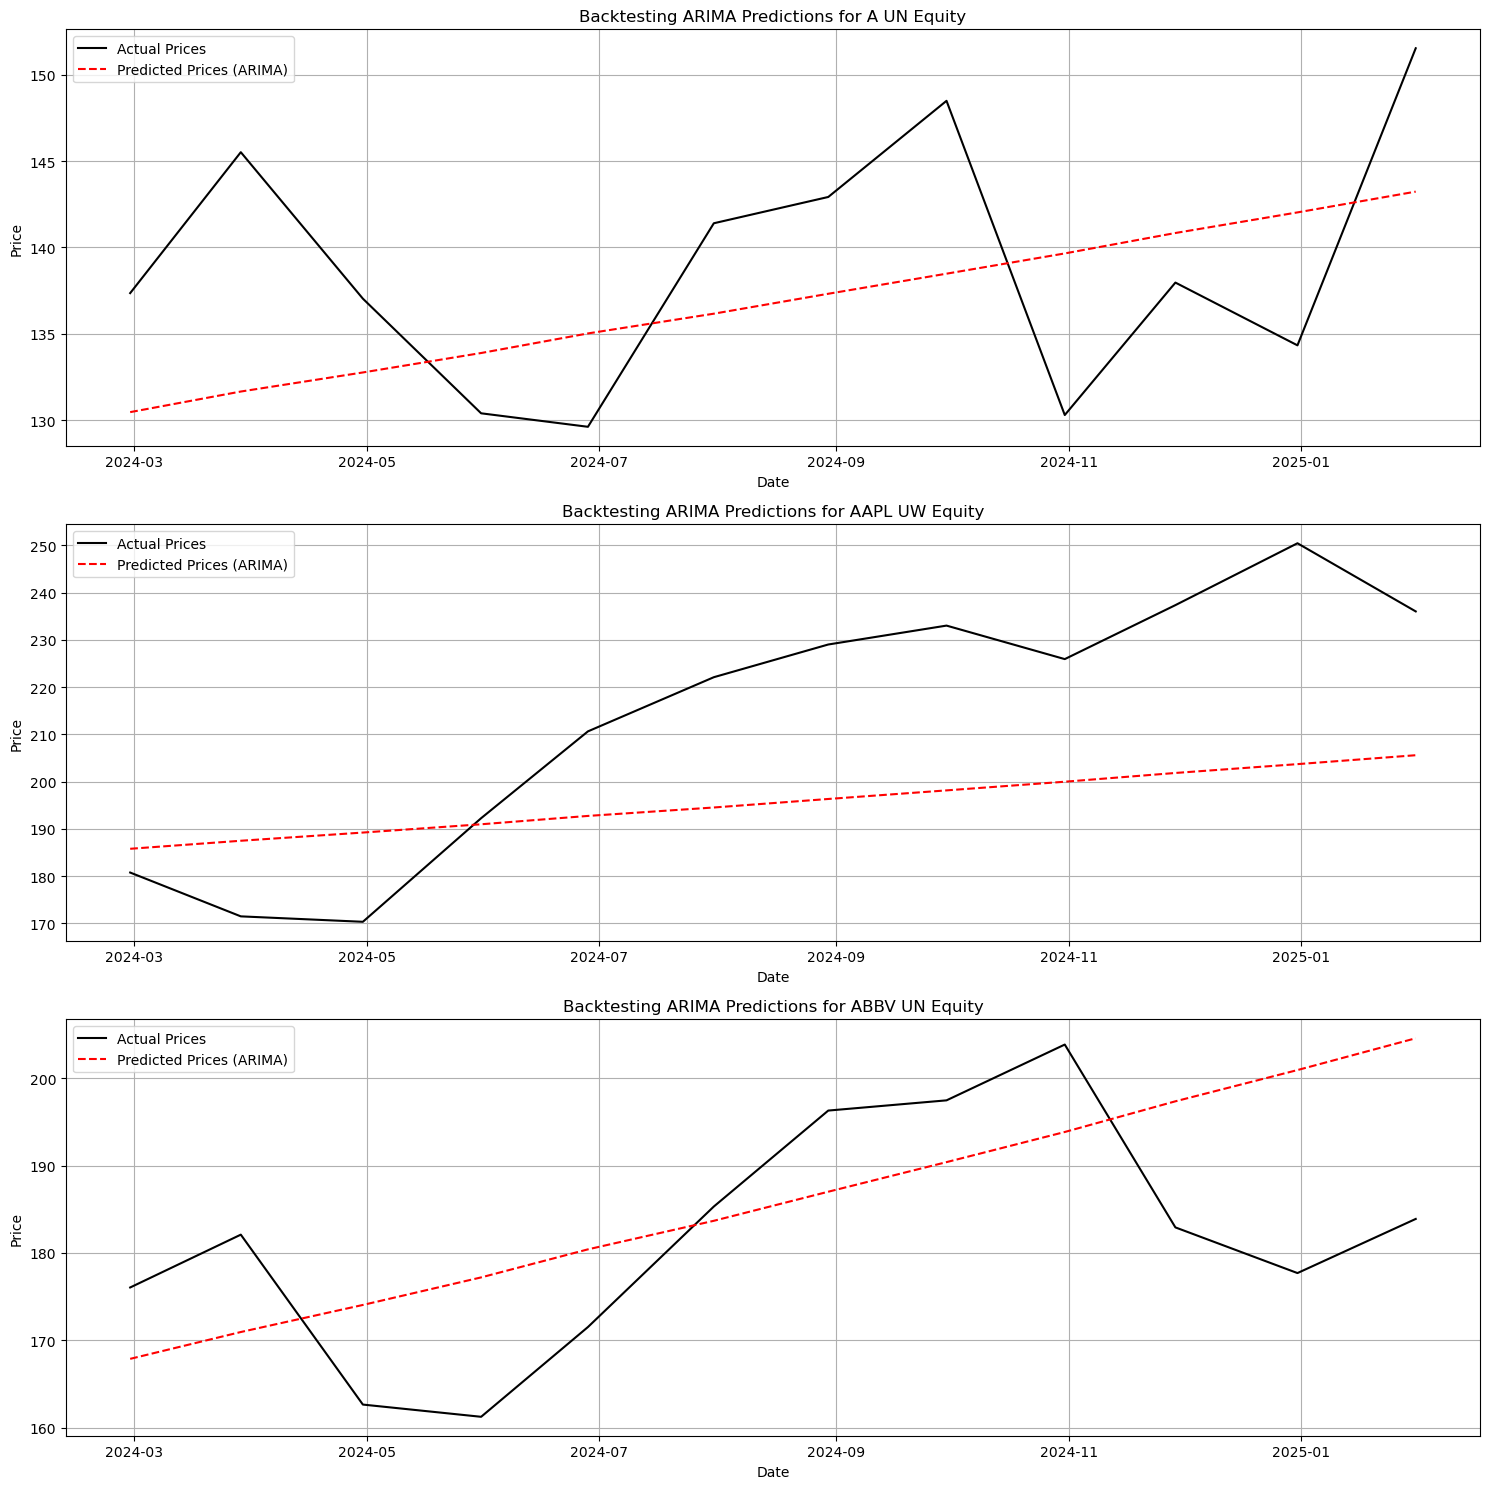

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
file_path = "Stock_Features_Complete.xlsx"  # Ensure this file is present
df_long = pd.read_excel(file_path)

# Ensure Date is in datetime format
df_long["Date"] = pd.to_datetime(df_long["Date"])

# Sort data by Ticker & Date
df_long = df_long.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)

# Dictionary to store backtest results for all tickers
backtest_results = {}

# Loop through each ticker and perform backtesting
for ticker in df_long["Ticker"].unique():
    df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")

    # Drop NaN values in Log Returns
    log_returns = df_stock["Log_Return"].dropna()

    # Skip tickers with insufficient data
    if len(log_returns) < 30:
        backtest_results[ticker] = {"status": "Insufficient data (Skipping)"}
        continue

    # Split Data: 80% Training, 20% Testing
    split_index = int(len(log_returns) * 0.8)
    train_data, test_data = log_returns[:split_index], log_returns[split_index:]

    # Fit ARIMA Model on Training Data
    try:
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast for Test Data
        forecast_steps = len(test_data)
        forecast = model_fit.forecast(steps=forecast_steps)

        # Convert Forecasted Log Returns to Prices
        last_train_price = df_stock["Closing_Price"].iloc[split_index - 1]

        # Ensure predicted prices array matches the length of actual prices
        predicted_prices = [last_train_price]
        for i in range(1, forecast_steps + 1):
            predicted_prices.append(predicted_prices[-1] * np.exp(forecast[i - 1]))

        # Drop the first element to match actual_prices length
        predicted_prices = predicted_prices[1:]

        # Ensure lengths match before evaluating
        actual_prices = df_stock["Closing_Price"].iloc[split_index : split_index + forecast_steps]

        # Compute RMSE & MAE
        rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
        mae = mean_absolute_error(actual_prices, predicted_prices)

        backtest_results[ticker] = {
            "status": "Backtest completed",
            "RMSE": rmse,
            "MAE": mae,
            "Actual Prices": actual_prices.values,
            "Predicted Prices": predicted_prices,
            "Test Dates": actual_prices.index
        }

    except Exception as e:
        backtest_results[ticker] = {"status": "Error", "error_message": str(e)}

# Display results summary
for ticker, result in backtest_results.items():
    print(f"\n📊 Ticker: {ticker}")
    print(f"   - Status: {result['status']}")
    if "RMSE" in result:
        print(f"   - RMSE: {result['RMSE']:.4f}")
        print(f"   - MAE: {result['MAE']:.4f}")
    if "error_message" in result:
        print(f"   - Error: {result['error_message']}")

# Visualization of a few selected tickers
selected_tickers = list(backtest_results.keys())[:3]  # Select first 3 tickers for visualization

plt.figure(figsize=(15, 5 * len(selected_tickers)))

for i, ticker in enumerate(selected_tickers, 1):
    if "Actual Prices" in backtest_results[ticker]:  # Only visualize successful backtests
        plt.subplot(len(selected_tickers), 1, i)
        plt.plot(backtest_results[ticker]["Test Dates"], backtest_results[ticker]["Actual Prices"], label="Actual Prices", color="black")
        plt.plot(backtest_results[ticker]["Test Dates"], backtest_results[ticker]["Predicted Prices"], label="Predicted Prices (ARIMA)", linestyle="dashed", color="red")

        plt.title(f"Backtesting ARIMA Predictions for {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend()
        plt.grid()

plt.tight_layout()
plt.show()


In [53]:
import numpy as np
import pandas as pd

# Define the forecast horizon (e.g., 5 months)
forecast_horizon = 5

# Extract forecasted log returns for each stock
expected_returns = {}
for ticker, result in backtest_results.items():
    if "Predicted Prices" in result:
        # Compute average predicted log return for next `forecast_horizon` months
        avg_log_return = np.mean(np.diff(np.log(result["Predicted Prices"][:forecast_horizon])))
        expected_returns[ticker] = avg_log_return

# Convert to DataFrame
expected_returns_df = pd.DataFrame.from_dict(expected_returns, orient='index', columns=['Expected_Log_Return'])

# Convert log returns to normal returns (for portfolio calculations)
expected_returns_df["Expected_Return"] = np.exp(expected_returns_df["Expected_Log_Return"]) - 1

print("\n📊 Expected Returns for Portfolio Optimization:\n")
print(expected_returns_df)



📊 Expected Returns for Portfolio Optimization:

                Expected_Log_Return  Expected_Return
A UN Equity                0.008571         0.008607
AAPL UW Equity             0.009187         0.009229
ABBV UN Equity             0.018010         0.018173
ABT UN Equity              0.010759         0.010817
ACGL UW Equity             0.025772         0.026107
...                             ...              ...
XYL UN Equity              0.015863         0.015989
YUM UN Equity              0.009422         0.009466
ZBH UN Equity              0.001791         0.001792
ZBRA UW Equity             0.002824         0.002828
ZTS UN Equity              0.010775         0.010833

[479 rows x 2 columns]


# Compute expected returns from backetsting

In [56]:
import numpy as np
import pandas as pd

# Define the forecast horizon (e.g., 5 months)
forecast_horizon = 5

# Extract forecasted log returns for each stock
expected_returns = {}
for ticker, result in backtest_results.items():
    if "Predicted Prices" in result:
        # Convert predicted prices to log returns
        predicted_prices = result["Predicted Prices"][:forecast_horizon + 1]
        log_returns = np.diff(np.log(predicted_prices))  # Compute log returns

        # Compute expected return as the mean of predicted log returns
        avg_log_return = np.mean(log_returns)
        expected_returns[ticker] = avg_log_return

# Convert to DataFrame
expected_returns_df = pd.DataFrame.from_dict(expected_returns, orient='index', columns=['Expected_Log_Return'])

# Convert log returns to normal returns (for portfolio calculations)
expected_returns_df["Expected_Return"] = np.exp(expected_returns_df["Expected_Log_Return"]) - 1

print("\n📊 Expected Returns from ARIMA Predictions:\n")
print(expected_returns_df)



📊 Expected Returns from ARIMA Predictions:

                Expected_Log_Return  Expected_Return
A UN Equity                0.008541         0.008577
AAPL UW Equity             0.009193         0.009235
ABBV UN Equity             0.018001         0.018164
ABT UN Equity              0.010739         0.010797
ACGL UW Equity             0.025610         0.025941
...                             ...              ...
XYL UN Equity              0.015693         0.015816
YUM UN Equity              0.009354         0.009398
ZBH UN Equity              0.001795         0.001797
ZBRA UW Equity             0.002790         0.002794
ZTS UN Equity              0.010775         0.010833

[479 rows x 2 columns]


# Selcting best

In [57]:
# Merge Expected Returns with Backtest Results
backtest_results_df = pd.DataFrame.from_dict(backtest_results, orient='index')

# Ensure only successfully backtested stocks are selected
backtest_results_df = backtest_results_df[backtest_results_df["status"] == "Backtest completed"]

# Merge with expected returns
backtest_results_df = backtest_results_df.merge(expected_returns_df, left_index=True, right_index=True)

# Compute risk-adjusted return (Expected Return / RMSE)
backtest_results_df["Risk_Adjusted_Return"] = backtest_results_df["Expected_Return"] / backtest_results_df["RMSE"]

# Select top N stocks based on risk-adjusted return
top_n = 50  # You can adjust the number of stocks to include
selected_stocks_df = backtest_results_df.sort_values(by="Risk_Adjusted_Return", ascending=False).head(top_n)

# Get list of selected tickers
selected_tickers = selected_stocks_df.index.tolist()

print("\n📊 Selected Stocks for Portfolio Optimization:\n")
print(selected_tickers)



📊 Selected Stocks for Portfolio Optimization:

['PCG UN Equity', 'GM UN Equity', 'CNP UN Equity', 'NWS UW Equity', 'ROL UN Equity', 'NWSA UW Equity', 'PNR UN Equity', 'L UN Equity', 'TSCO UW Equity', 'CPRT UW Equity', 'EQT UN Equity', 'SYF UN Equity', 'CTRA UN Equity', 'ANET UN Equity', 'KKR UN Equity', 'TPR UN Equity', 'CMG UN Equity', 'JPM UN Equity', 'TRMB UW Equity', 'APH UN Equity', 'SPG UN Equity', 'JNPR UN Equity', 'WRB UN Equity', 'AVGO UW Equity', 'IR UN Equity', 'FITB UW Equity', 'HPE UN Equity', 'HLT UN Equity', 'MAS UN Equity', 'NCLH UN Equity', 'NVDA UW Equity', 'CSX UW Equity', 'OKE UN Equity', 'AIG UN Equity', 'ACGL UW Equity', 'HBAN UW Equity', 'OTIS UN Equity', 'AFL UN Equity', 'BX UN Equity', 'CTAS UW Equity', 'EBAY UW Equity', 'HIG UN Equity', 'FAST UW Equity', 'GE UN Equity', 'COF UN Equity', 'PFG UW Equity', 'FTNT UW Equity', 'RSG UN Equity', 'MET UN Equity', 'CF UN Equity']


In [58]:
# Extract historical log returns for the selected stocks
historical_log_returns = df_long.pivot(index="Date", columns="Ticker", values="Log_Return")

# Compute covariance matrix for selected stocks
cov_matrix = historical_log_returns[selected_tickers].cov()

print("\n📊 Covariance Matrix of Selected Stocks:\n")
print(cov_matrix)



📊 Covariance Matrix of Selected Stocks:

Ticker          PCG UN Equity  GM UN Equity  CNP UN Equity  NWS UW Equity  \
Ticker                                                                      
PCG UN Equity        0.009373      0.003831       0.001846       0.002744   
GM UN Equity         0.003831      0.011260       0.002440       0.005200   
CNP UN Equity        0.001846      0.002440       0.003328       0.001561   
NWS UW Equity        0.002744      0.005200       0.001561       0.007693   
ROL UN Equity        0.000836      0.001375       0.001701       0.001096   
NWSA UW Equity       0.002943      0.005444       0.001601       0.007668   
PNR UN Equity        0.001502      0.004292       0.001447       0.002929   
L UN Equity          0.001461      0.002192       0.001079       0.002193   
TSCO UW Equity       0.001745      0.002309       0.001461       0.002666   
CPRT UW Equity       0.001959      0.003256       0.001919       0.002992   
EQT UN Equity        0.003936     

In [59]:
import scipy.optimize as sco

# Extract expected returns as numpy array
selected_expected_returns = selected_stocks_df["Expected_Return"].values

# Define function to calculate portfolio performance
def portfolio_performance(weights, expected_returns, cov_matrix):
    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Define function to maximize Sharpe Ratio
def neg_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_return, port_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return - (port_return - risk_free_rate) / port_volatility  # Maximize Sharpe Ratio

# Initial weights (equal distribution)
num_selected_stocks = len(selected_tickers)
init_guess = np.array(num_selected_stocks * [1.0 / num_selected_stocks])

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: Each weight between 0% and 100%
bounds = tuple((0, 1) for _ in range(num_selected_stocks))

# Optimize Portfolio
optimal_portfolio = sco.minimize(neg_sharpe_ratio, init_guess, args=(selected_expected_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights
optimal_weights = optimal_portfolio.x

# Store results
selected_stocks_df["Optimal_Weight"] = optimal_weights

print("\n📊 Optimized Portfolio Allocation:\n")
print(selected_stocks_df[["Expected_Return", "Optimal_Weight"]])



📊 Optimized Portfolio Allocation:

                Expected_Return  Optimal_Weight
PCG UN Equity          0.013164    0.000000e+00
GM UN Equity           0.025614    0.000000e+00
CNP UN Equity          0.011369    6.196875e-16
NWS UW Equity          0.042652    8.964904e-17
ROL UN Equity          0.012774    2.726758e-16
NWSA UW Equity         0.041816    1.532937e-16
PNR UN Equity          0.037636    0.000000e+00
L UN Equity            0.016489    0.000000e+00
TSCO UW Equity         0.021637    0.000000e+00
CPRT UW Equity         0.024573    0.000000e+00
EQT UN Equity          0.021054    0.000000e+00
SYF UN Equity          0.031406    0.000000e+00
CTRA UN Equity         0.007789    2.361634e-16
ANET UN Equity         0.036803    1.643737e-16
KKR UN Equity          0.072667    3.032814e-02
TPR UN Equity          0.030873    7.885467e-17
CMG UN Equity          0.043729    1.209942e-16
JPM UN Equity          0.032205    1.779154e-16
TRMB UW Equity         0.026427    0.000000e+00
APH 

# 5 month thing

In [62]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Define validation period (last 5 months)
validation_horizon = 5

# Dictionary to store ARIMA validation results
validation_results = {}

# Train ARIMA using only `total_years - validation_horizon` data
for ticker in df_long["Ticker"].unique():
    df_stock = df_long[df_long["Ticker"] == ticker].set_index("Date")

    # Drop NaN values in Log Returns
    log_returns = df_stock["Log_Return"].dropna()

    # Ensure we have enough data
    if len(log_returns) < validation_horizon + 30:
        continue  # Skip if data is insufficient

    # Train-Test Split (use all data except last 5 months for training)
    train_data = log_returns.iloc[:-validation_horizon]
    test_data = log_returns.iloc[-validation_horizon:]  # Last 5 months

    # Fit ARIMA Model
    try:
        model = ARIMA(train_data, order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast for the last 5 months (known period)
        forecast = model_fit.forecast(steps=validation_horizon)

        # Convert log returns to price predictions
        last_train_price = df_stock["Closing_Price"].iloc[-validation_horizon - 1]
        predicted_prices = [last_train_price]

        for i in range(validation_horizon):
            predicted_prices.append(predicted_prices[-1] * np.exp(forecast[i]))

        # Drop the first element to match actual price length
        predicted_prices = predicted_prices[1:]

        # Store validation results
        validation_results[ticker] = {
            "Actual_Prices": df_stock["Closing_Price"].iloc[-validation_horizon:].values,
            "Predicted_Prices": predicted_prices,
            "Test_Dates": df_stock.index[-validation_horizon:],
            "Actual_Log_Returns": test_data.values,
            "Predicted_Log_Returns": forecast.values
        }

    except Exception as e:
        validation_results[ticker] = {"status": "Error", "error_message": str(e)}

print("\n✅ ARIMA Model Validation Completed for Historical 5-Month Period.")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BME will be used.
  self._init_dates(dates, freq)
/var/folders/80/xk4znjv54bx9c18vyc4w5f6c0000gn/T/ipykernel_61276/3469554544.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices.append(predicted_prices[-1] * np.exp(forec


✅ ARIMA Model Validation Completed for Historical 5-Month Period.


/var/folders/80/xk4znjv54bx9c18vyc4w5f6c0000gn/T/ipykernel_61276/3469554544.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices.append(predicted_prices[-1] * np.exp(forecast[i]))


In [63]:
print(validation_results)

{'A UN Equity': {'Actual_Prices': array([130.31, 137.97, 134.34, 151.52, 127.92]), 'Predicted_Prices': [149.7351744168469, 151.40905517601988, 153.06416191747724, 154.74079913155325, 156.4354865874133], 'Test_Dates': DatetimeIndex(['2024-10-31', '2024-11-29', '2024-12-31', '2025-01-31',
               '2025-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None), 'Actual_Log_Returns': array([-0.13053404,  0.05712004, -0.02666237,  0.12034373, -0.16931256]), 'Predicted_Log_Returns': array([0.00841796, 0.01111692, 0.01087204, 0.01089426, 0.01089225])}, 'AAPL UW Equity': {'Actual_Prices': array([225.91, 237.33, 250.42, 236.  , 241.84]), 'Predicted_Prices': [237.93503888616908, 243.0758165701567, 248.33948898420044, 253.7185244390721, 259.2142311685809], 'Test_Dates': DatetimeIndex(['2024-10-31', '2024-11-29', '2024-12-31', '2025-01-31',
               '2025-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None), 'Actual_Log_Returns': array([-0.03090176,  0.0

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dictionary to store validation performance metrics
validation_metrics = {}

# Loop through validated tickers
for ticker, result in validation_results.items():
    if "Actual_Log_Returns" in result:
        # Compute RMSE and MAE for validation
        rmse = np.sqrt(mean_squared_error(result["Actual_Log_Returns"], result["Predicted_Log_Returns"]))
        mae = mean_absolute_error(result["Actual_Log_Returns"], result["Predicted_Log_Returns"])

        # Store validation performance
        validation_metrics[ticker] = {
            "RMSE": rmse,
            "MAE": mae
        }

# Convert to DataFrame
validation_metrics_df = pd.DataFrame.from_dict(validation_metrics, orient='index')

# Sort by lowest RMSE (best predictions)
validation_metrics_df = validation_metrics_df.sort_values(by="RMSE")

print("\n📊 ARIMA Validation Performance (Sorted by Best Accuracy):\n")
print(validation_metrics_df.head(10))  # Show top 10 most accurate predictions



📊 ARIMA Validation Performance (Sorted by Best Accuracy):

                    RMSE       MAE
K UN Equity     0.006881  0.005871
JKHY UW Equity  0.021573  0.017410
CLX UN Equity   0.031492  0.028336
HLT UN Equity   0.032314  0.025554
PFE UN Equity   0.032433  0.023317
MA UN Equity    0.033104  0.028237
MSCI UN Equity  0.033504  0.031357
STT UN Equity   0.034943  0.032430
WDAY UW Equity  0.035781  0.027949
INTU UW Equity  0.036187  0.032839


In [50]:
# Extract historical log returns from dataset
historical_log_returns = df_long.pivot(index="Date", columns="Ticker", values="Log_Return")

# Compute covariance matrix (based on historical data)
cov_matrix = historical_log_returns.cov()

print("\n📊 Covariance Matrix of Stocks:\n")
print(cov_matrix)



📊 Covariance Matrix of Stocks:

Ticker          A UN Equity  AAPL UW Equity  ABBV UN Equity  ABT UN Equity  \
Ticker                                                                       
A UN Equity        0.006452        0.002488        0.001689       0.002740   
AAPL UW Equity     0.002488        0.006362        0.000895       0.001827   
ABBV UN Equity     0.001689        0.000895        0.004684       0.001347   
ABT UN Equity      0.002740        0.001827        0.001347       0.003666   
ACGL UW Equity     0.001207        0.000534        0.001460       0.000176   
...                     ...             ...             ...            ...   
XYL UN Equity      0.003750        0.002464        0.000686       0.002502   
YUM UN Equity      0.002433        0.002276        0.001904       0.002566   
ZBH UN Equity      0.003005        0.001764        0.001446       0.002558   
ZBRA UW Equity     0.006239        0.004662        0.001788       0.002691   
ZTS UN Equity      0.003362    

In [51]:
import scipy.optimize as sco

# Define function for portfolio performance
def portfolio_performance(weights, expected_returns, cov_matrix):
    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Define function to minimize (Sharpe Ratio maximization)
def neg_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_return, port_volatility = portfolio_performance(weights, expected_returns, cov_matrix)
    return - (port_return - risk_free_rate) / port_volatility  # Maximize Sharpe Ratio

# Number of stocks
num_stocks = len(expected_returns_df)

# Initial weights (equal distribution)
init_guess = np.array(num_stocks * [1.0 / num_stocks])

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: Each weight between 0% and 100%
bounds = tuple((0, 1) for _ in range(num_stocks))

# Optimize Portfolio
optimal_portfolio = sco.minimize(neg_sharpe_ratio, init_guess, args=(expected_returns_df["Expected_Return"].values, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Extract optimal weights
optimal_weights = optimal_portfolio.x

# Store results
expected_returns_df["Optimal_Weight"] = optimal_weights

print("\n📊 Optimal Portfolio Allocation:\n")
print(expected_returns_df[["Expected_Return", "Optimal_Weight"]])



📊 Optimal Portfolio Allocation:

                Expected_Return  Optimal_Weight
A UN Equity            0.008607    2.082671e-15
AAPL UW Equity         0.009229    9.549675e-16
ABBV UN Equity         0.018173    2.238044e-14
ABT UN Equity          0.010817    9.655183e-15
ACGL UW Equity         0.026107    2.426803e-14
...                         ...             ...
XYL UN Equity          0.015989    2.425955e-15
YUM UN Equity          0.009466    3.481847e-15
ZBH UN Equity          0.001792    4.099521e-16
ZBRA UW Equity         0.002828    7.119788e-15
ZTS UN Equity          0.010833    2.089619e-15

[479 rows x 2 columns]


🚀 Steps to Construct & Evaluate the Portfolio
✅ Step 1: Use ARIMA Predictions to Rank & Filter Stocks
Select stocks with the best forecasted returns (ARIMA predictions).
Filter out stocks with high RMSE or poor backtesting results.
✅ Step 2: Construct an Optimal Portfolio
Use Markowitz Portfolio Optimization (Mean-Variance Optimization).
Optimize weights for risk-adjusted performance.
✅ Step 3: Backtest Portfolio vs. S&P 500
Simulate portfolio performance over the next 5 months.
Compare against actual S&P 500 returns.
✅ Step 4: Evaluate & Compare Performance
Compute Sharpe Ratio, Alpha, Beta, Max Drawdown vs. S&P 500.


In [52]:
import pandas as pd
import numpy as np

# Convert backtest results into a DataFrame
arima_results_df = pd.DataFrame.from_dict(backtest_results, orient='index')

# Filter out stocks with errors in ARIMA modeling
arima_results_df = arima_results_df[arima_results_df["status"] == "Backtest completed"]

# Sort stocks by highest expected return & lowest RMSE
arima_results_df["Risk_Adjusted_Return"] = arima_results_df["Expected_Return"] / arima_results_df["RMSE"]
top_stocks_df = arima_results_df.sort_values(by="Risk_Adjusted_Return", ascending=False).head(50)

# Select tickers of the best stocks
selected_tickers = top_stocks_df.index.tolist()

print("\n📊 Selected Stocks for Portfolio Optimization:\n")
print(selected_tickers)


KeyError: 'Expected_Return'